In [33]:
import pandas as pd

In [34]:
#Initialiizing empty DataFrame
df = pd.DataFrame()

Downloading data from zillow website using RapidAPI

In [39]:
import requests
try:
    for i in range(0,1): 
        
        url = "https://zillow-com1.p.rapidapi.com/property"
        
        querystring = {"zpid":"{}".format(i)}
        
        headers = {
        	"x-rapidapi-key": "2c68467ce7msh8a6d1de9aa445bap1aed5ajsn1fa560c968fb",
        	"x-rapidapi-host": "zillow-com1.p.rapidapi.com"
        }
        
        response = requests.get(url, headers=headers, params=querystring)
        data=response.json()
        tempdf = pd.DataFrame.from_dict(data,orient='index')
        temp_df=tempdf.transpose()
        df = df._append(temp_df,ignore_index=True)
except Exception as e:
    print(e)

In [ ]:
df.to_excel('api_data.xlsx')

In [ ]:
#Loading the saved data from excel
data = pd.read_excel(r'C:\Users\Moham\api_data.xlsx')

In [ ]:
#Column names in the data extracted
data.columns

Index(['Unnamed: 0', 'buildingPermits', 'contact_recipients', 'longitude',
       'countyFIPS', 'imgSrc', 'livingAreaValue', 'streetAddress', 'county',
       'monthlyHoaFee', 'timeZone', 'taxHistory', 'dateSold',
       'annualHomeownersInsurance', 'state', 'listed_by', 'yearBuilt',
       'brokerageName', 'description', 'latitude', 'nearbyHomes',
       'priceHistory', 'schools', 'rentZestimate', 'city', 'providerListingID',
       'currency', 'listingProvider', 'zestimateLowPercent',
       'openHouseSchedule', 'mortgageRates', 'address', 'cityId',
       'timeOnZillow', 'url', 'zestimate', 'zpid', 'countyId', 'brokerId',
       'livingAreaUnits', 'comingSoonOnMarketDate', 'livingArea', 'building',
       'stateId', 'zipcode', 'propertyTaxRate', 'attributionInfo', 'bathrooms',
       'homeStatus', 'homeFacts', 'resoFacts', 'datePosted', 'bedrooms',
       'propertyTypeDimension', 'mortgageZHLRates', 'price', 'favoriteCount',
       'isListedByOwner', 'zestimateHighPercent', 'mlsid',

In [ ]:
#sample data
data.head()

,Unnamed: 0,buildingPermits,contact_recipients,longitude,countyFIPS,imgSrc,livingAreaValue,streetAddress,county,monthlyHoaFee,...,mlsid,listingSubType,pageViewCount,buildingId,country,homeType,solarPotential,contingentListingType,message,resoFacts.daysOnZillow
0,0,NaN,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-149.90807,2020.0,https://photos.zillowstatic.com/fp/ce047439c86...,2668.0,500 North St,Anchorage Borough,NaN,...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",12925.0,NaN,USA,SINGLE_FAMILY,NaN,NaN,NaN,NaN
1,1,NaN,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-149.90822,2020.0,https://maps.googleapis.com/maps/api/streetvie...,3179.0,520 N St,Anchorage Borough,NaN,...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",26.0,NaN,USA,SINGLE_FAMILY,NaN,NaN,NaN,NaN
2,2,NaN,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-149.90833,2020.0,https://maps.googleapis.com/maps/api/streetvie...,3059.0,522 N St,Anchorage Borough,NaN,...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",21.0,NaN,USA,SINGLE_FAMILY,NaN,NaN,NaN,NaN
3,3,NaN,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN
4,4,NaN,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-149.90834,2020.0,https://photos.zillowstatic.com/fp/10602cde74a...,1642.0,530 North St,Anchorage Borough,NaN,...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",26.0,NaN,USA,SINGLE_FAMILY,NaN,NaN,NaN,NaN


__Selecting the columns that are relevant for the house price prediction__

Homeowners insurance policies generally cover destruction and damage to a residence's interior and exterior, the loss or theft of possessions, and personal liability for harm to others.

State in which house is located

Year in which house was built

Living Area: Area of the living space in house in SQFT

Bathrooms: Number of Bathroom in the House

Bedrooms: Number of Bedrooms in the House

HomeType: Residential Type of the House. Ex: Single Family, Multi Family

Price: price of the House (Dependent Feature)

In [ ]:
#Creating Dataframe with the selected columns
df = pd.DataFrame(data[['annualHomeownersInsurance','state','yearBuilt','livingArea','bathrooms','bedrooms','homeType','price']])

__Data Cleaning__

In [ ]:
df.head()

,annualHomeownersInsurance,state,yearBuilt,livingArea,bathrooms,bedrooms,homeType,price
0,2840,AK,1959.0,2668.0,2.0,3.0,SINGLE_FAMILY,676100
1,2934,AK,1961.0,3179.0,2.0,3.0,SINGLE_FAMILY,698600
2,4187,AK,1983.0,3059.0,3.0,4.0,SINGLE_FAMILY,996800
3,0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2920,AK,1947.0,1642.0,2.0,5.0,SINGLE_FAMILY,695300


In [ ]:
#Renaming columns
df = df.rename(columns={'annualHomeownersInsurance':'AnnualHomeOwnerInsurance','state':'State','yearBuilt':'YearBuilt','livingArea':'LivingArea','bathrooms':'Bathrooms','bedrooms':'Bedrooms','homeType':'HomeType','price':'Price'})

In [ ]:
df.head()

,AnnualHomeOwnerInsurance,State,YearBuilt,LivingArea,Bathrooms,Bedrooms,HomeType,Price
0,2840,AK,1959.0,2668.0,2.0,3.0,SINGLE_FAMILY,676100
1,2934,AK,1961.0,3179.0,2.0,3.0,SINGLE_FAMILY,698600
2,4187,AK,1983.0,3059.0,3.0,4.0,SINGLE_FAMILY,996800
3,0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2920,AK,1947.0,1642.0,2.0,5.0,SINGLE_FAMILY,695300


In [ ]:
#There are some rows which are entirely blank for example, see the third row
df.iloc[3]

AnnualHomeOwnerInsurance      0
State                       NaN
YearBuilt                   NaN
LivingArea                  NaN
Bathrooms                   NaN
Bedrooms                    NaN
HomeType                    NaN
Price                         0
Name: 3, dtype: object

In [ ]:
df[df['State'].isna()]

,AnnualHomeOwnerInsurance,State,YearBuilt,LivingArea,Bathrooms,Bedrooms,HomeType,Price
3,0,NaN,NaN,NaN,NaN,NaN,NaN,0
11,0,NaN,NaN,NaN,NaN,NaN,NaN,0
33,0,NaN,NaN,NaN,NaN,NaN,NaN,0
48,0,NaN,NaN,NaN,NaN,NaN,NaN,0
53,0,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...
6944,0,NaN,NaN,NaN,NaN,NaN,NaN,0
6986,0,NaN,NaN,NaN,NaN,NaN,NaN,0
6989,0,NaN,NaN,NaN,NaN,NaN,NaN,0
7057,0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
#Dropping those invalid rows from data
df = df.drop(df.index[df['State'].isna()])

In [ ]:
df.head()

,AnnualHomeOwnerInsurance,State,YearBuilt,LivingArea,Bathrooms,Bedrooms,HomeType,Price
0,2840,AK,1959.0,2668.0,2.0,3.0,SINGLE_FAMILY,676100
1,2934,AK,1961.0,3179.0,2.0,3.0,SINGLE_FAMILY,698600
2,4187,AK,1983.0,3059.0,3.0,4.0,SINGLE_FAMILY,996800
4,2920,AK,1947.0,1642.0,2.0,5.0,SINGLE_FAMILY,695300
5,4100,AK,2000.0,4483.0,4.0,4.0,CONDO,976100


In [ ]:
#Resetting Index
df.reset_index(drop=True,inplace=True)
df

,AnnualHomeOwnerInsurance,State,YearBuilt,LivingArea,Bathrooms,Bedrooms,HomeType,Price
0,2840,AK,1959.0,2668.0,2.0,3.0,SINGLE_FAMILY,676100
1,2934,AK,1961.0,3179.0,2.0,3.0,SINGLE_FAMILY,698600
2,4187,AK,1983.0,3059.0,3.0,4.0,SINGLE_FAMILY,996800
3,2920,AK,1947.0,1642.0,2.0,5.0,SINGLE_FAMILY,695300
4,4100,AK,2000.0,4483.0,4.0,4.0,CONDO,976100
...,...,...,...,...,...,...,...,...
6038,2764,AK,1978.0,4263.0,2.5,3.0,SINGLE_FAMILY,658100
6039,2160,AK,1974.0,2200.0,2.0,4.0,SINGLE_FAMILY,514200
6040,2768,AK,1972.0,4180.0,4.5,5.0,SINGLE_FAMILY,659000
6041,2979,AK,1972.0,3928.0,3.0,5.0,SINGLE_FAMILY,709400


In [ ]:
#Checking Missing Values in data
df.describe()

,AnnualHomeOwnerInsurance,YearBuilt,LivingArea,Bathrooms,Bedrooms,Price
count,6043.000000,5690.000000,5869.000000,5917.000000,5832.000000,6.043000e+03
mean,1436.004633,1976.310545,1795.795025,2.059422,3.161008,3.419019e+05
std,922.244360,13.387253,1532.936783,0.996827,1.294939,2.195807e+05
min,0.000000,1880.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,873.500000,1970.000000,1141.000000,1.500000,2.000000,2.079500e+05
50%,1503.000000,1977.000000,1670.000000,2.000000,3.000000,3.579000e+05
75%,1897.000000,1983.000000,2128.000000,2.500000,4.000000,4.517000e+05
max,11550.000000,2023.000000,95337.000000,30.000000,30.000000,2.750000e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6043 entries, 0 to 6042
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AnnualHomeOwnerInsurance  6043 non-null   int64  
 1   State                     6043 non-null   object 
 2   YearBuilt                 5690 non-null   float64
 3   LivingArea                5869 non-null   float64
 4   Bathrooms                 5917 non-null   float64
 5   Bedrooms                  5832 non-null   float64
 6   HomeType                  6043 non-null   object 
 7   Price                     6043 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 377.8+ KB


In [ ]:
df.isnull().sum()

AnnualHomeOwnerInsurance      0
State                         0
YearBuilt                   353
LivingArea                  174
Bathrooms                   126
Bedrooms                    211
HomeType                      0
Price                         0
dtype: int64

YearBuilt, LivingArea, Bathrooms, Bedrooms has missing values. Since, already we have only limited data we will impute these missing values

__EDA__

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

House Location

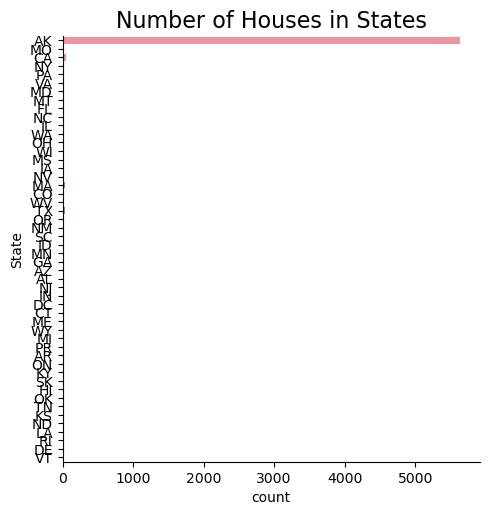

In [ ]:
sns.catplot(data=df,y='State',kind='count')
plt.title("Number of Houses in States", fontsize=16)
plt.show()

Most of the houses located in the Alaska state

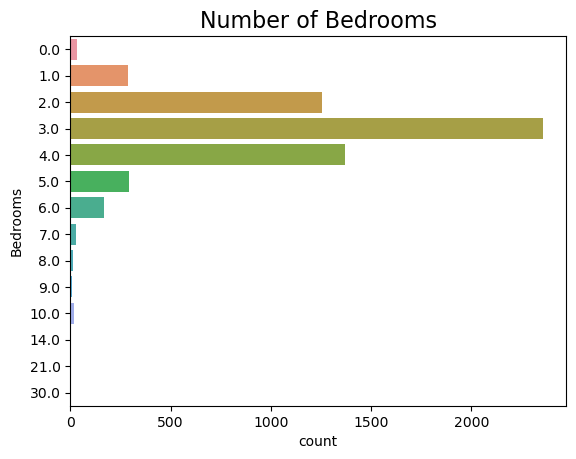

In [ ]:
plt.title("Number of Bedrooms",fontsize=16)
sns.countplot(y=df['Bedrooms'])
plt.show()

Most of the houses has 3 bedrooms

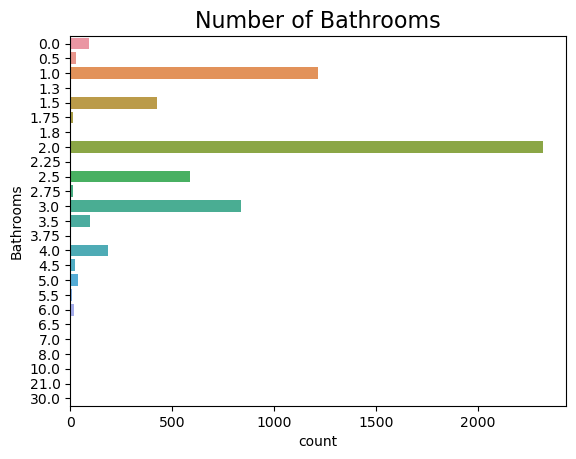

In [ ]:
plt.title("Number of Bathrooms",fontsize=16)
sns.countplot(y=df['Bathrooms'])
plt.show()

Most of the houses has 2 Bathrooms

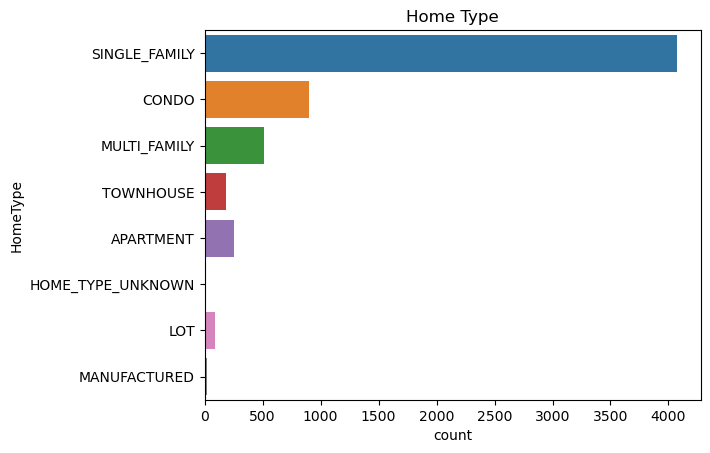

In [ ]:
plt.title("Home Type")
sns.countplot(y='HomeType',data=df)
plt.show()

Most of the Houses are Single Family type

In [ ]:
Numerical_Categories=df.columns[df.dtypes!='O']

Pair Plot between Numerical Columns

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

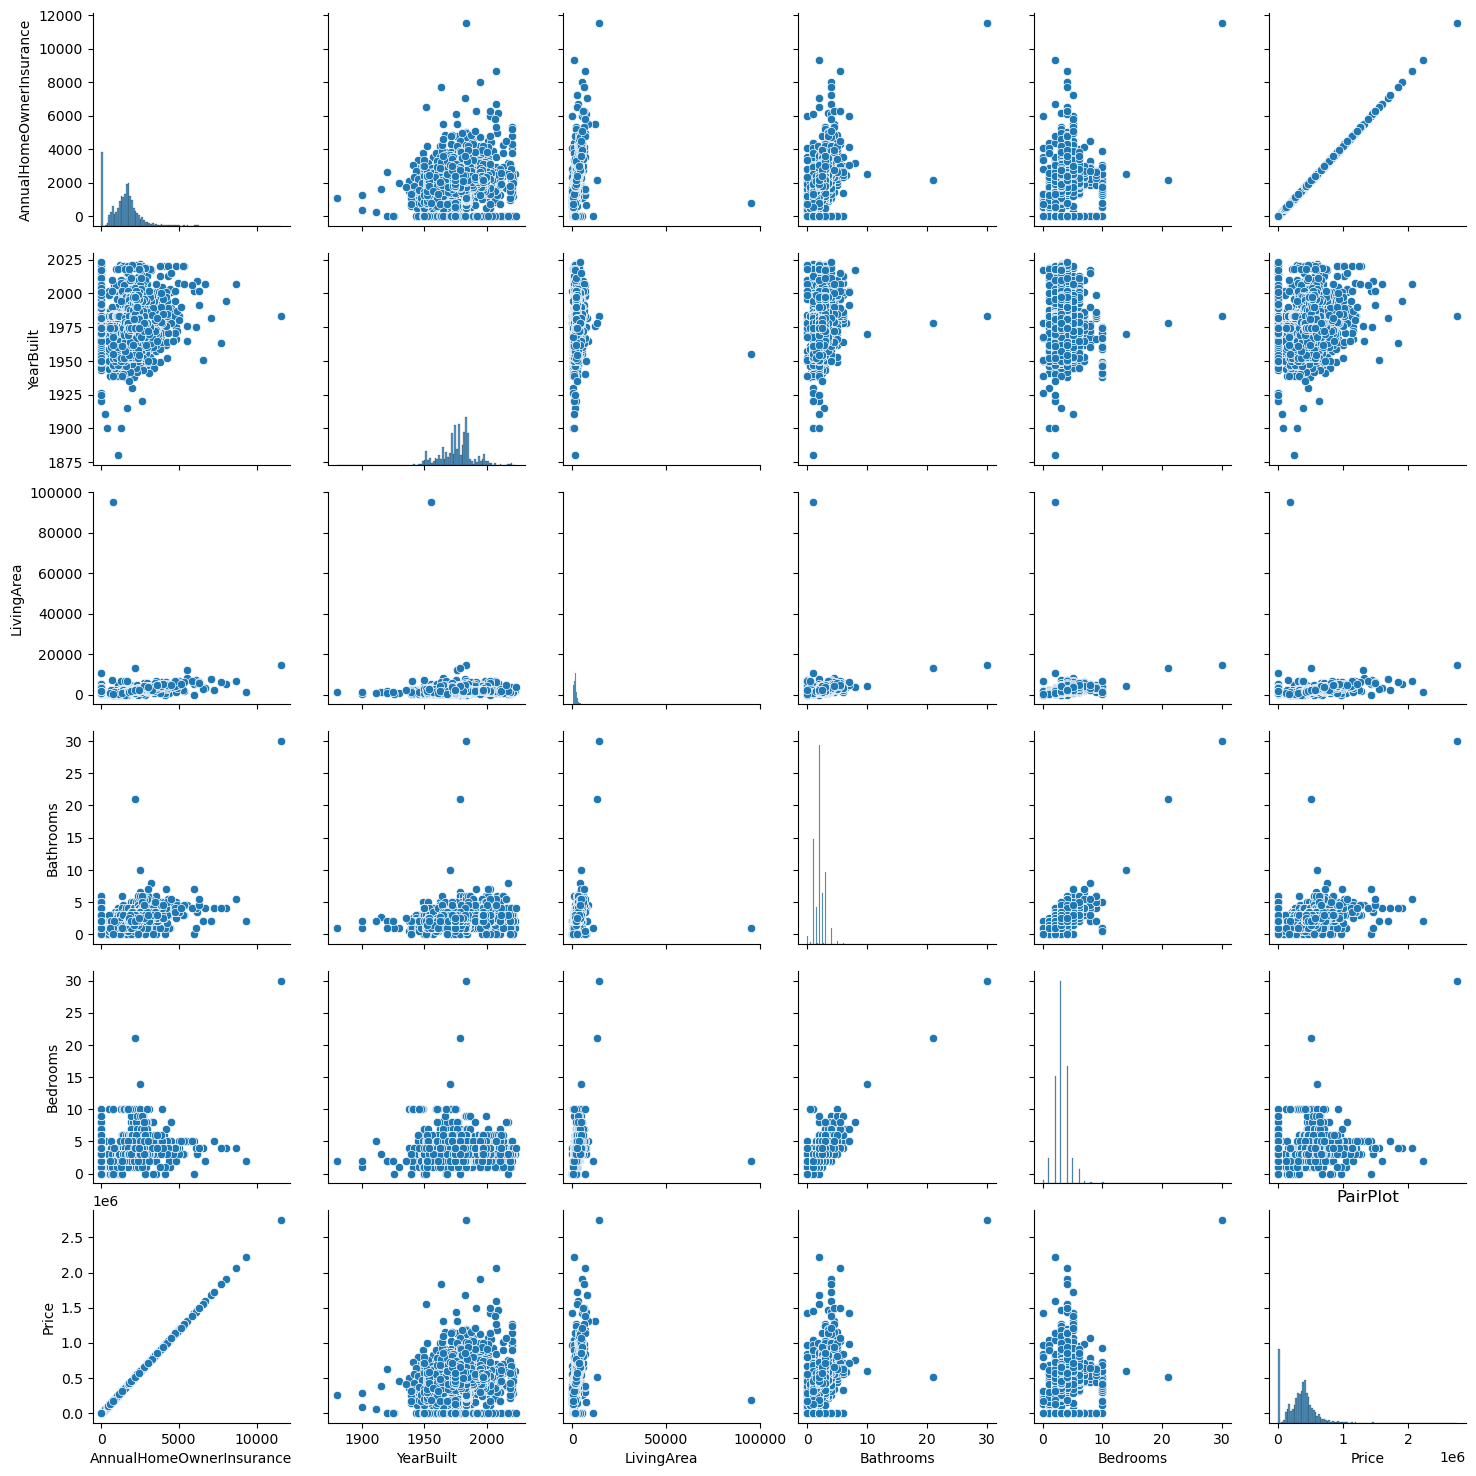

In [ ]:
sns.pairplot(df[Numerical_Categories])
plt.title("PairPlot")
plt.show()

AnnualHomeOwnerInsurance and Price is showing linear relationship

In [ ]:
corr = df[Numerical_Categories].corr()
corr

,AnnualHomeOwnerInsurance,YearBuilt,LivingArea,Bathrooms,Bedrooms,Price
AnnualHomeOwnerInsurance,1.000000,0.085398,0.382265,0.473466,0.413773,1.000000
YearBuilt,0.085398,1.000000,0.031886,0.208652,-0.000363,0.085402
LivingArea,0.382265,0.031886,1.000000,0.420315,0.379125,0.382270
Bathrooms,0.473466,0.208652,0.420315,1.000000,0.653208,0.473468
Bedrooms,0.413773,-0.000363,0.379125,0.653208,1.000000,0.413772
Price,1.000000,0.085402,0.382270,0.473468,0.413772,1.000000


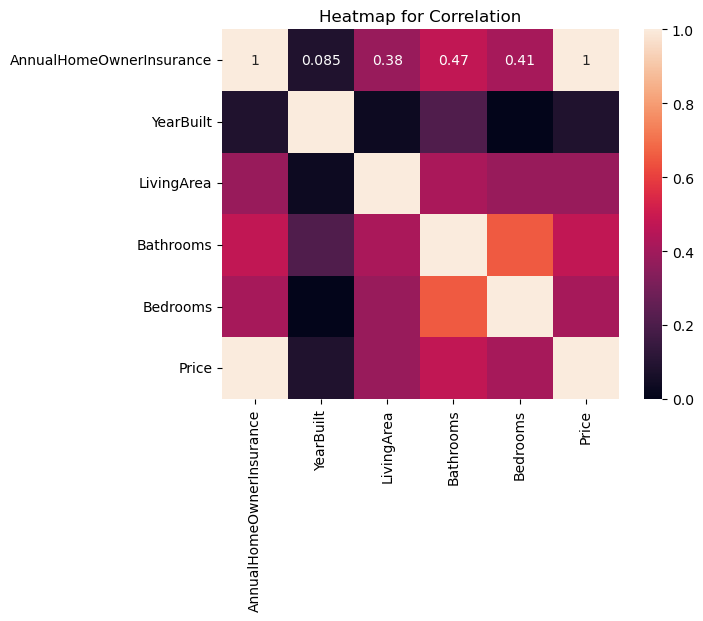

In [ ]:
plt.title("Heatmap for Correlation")
sns.heatmap(corr,annot=)
plt.show()

AnnualHomeOwnerInsurance shows strong correlation with Price.

Converting Categorical Values to Numerical using OneHotEncoding

In [ ]:
df['State'].unique()

array(['AK', 'MO', 'CA', 'NY', 'PA', 'VA', 'MD', 'MT', 'FL', 'NC', 'IL',
       'WA', 'OH', 'WI', 'MS', 'IA', 'NV', 'MA', 'CO', 'WV', 'TX', 'OR',
       'NM', 'SC', 'ID', 'MN', 'GA', 'AZ', 'AL', 'NJ', 'IN', 'DC', 'CT',
       'ME', 'WY', 'MI', 'PR', 'AR', 'ON', 'KY', 'SK', 'HI', 'OK', 'TN',
       'KS', 'ND', 'LA', 'RI', 'DE', 'VT'], dtype=object)

In [ ]:
df['HomeType'].unique()

array(['SINGLE_FAMILY', 'CONDO', 'MULTI_FAMILY', 'TOWNHOUSE', 'APARTMENT',
       'HOME_TYPE_UNKNOWN', 'LOT', 'MANUFACTURED'], dtype=object)

In [ ]:
categorical_columns=['State','HomeType']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(dtype=int,sparse_output=False)
encoded_columns = encoder.fit_transform(df[categorical_columns])
encoded_columns_df = pd.DataFrame(encoded_columns,columns=encoder.get_feature_names_out(categorical_columns))
df_encoded = pd.concat([df,encoded_columns_df],axis=1)
df_encoded = df_encoded.drop(categorical_columns,axis=1)
df_encoded.head()

,AnnualHomeOwnerInsurance,YearBuilt,LivingArea,Bathrooms,Bedrooms,Price,State_AK,State_AL,State_AR,State_AZ,...,State_WV,State_WY,HomeType_APARTMENT,HomeType_CONDO,HomeType_HOME_TYPE_UNKNOWN,HomeType_LOT,HomeType_MANUFACTURED,HomeType_MULTI_FAMILY,HomeType_SINGLE_FAMILY,HomeType_TOWNHOUSE
0,2840,1959.0,2668.0,2.0,3.0,676100,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2934,1961.0,3179.0,2.0,3.0,698600,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4187,1983.0,3059.0,3.0,4.0,996800,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2920,1947.0,1642.0,2.0,5.0,695300,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4100,2000.0,4483.0,4.0,4.0,976100,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#Saving the encoder for prediction
import pickle
import os
pickle.dump(encoder,open(os.path.join('Artifacts','encoder.pkl'),'wb'))

__Imputing Missing Values__

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed=imputer.fit_transform(df_encoded)
df_imputed=pd.DataFrame(df_imputed,columns=df_encoded.columns)

In [ ]:
df_imputed.head()

,AnnualHomeOwnerInsurance,YearBuilt,LivingArea,Bathrooms,Bedrooms,Price,State_AK,State_AL,State_AR,State_AZ,...,State_WV,State_WY,HomeType_APARTMENT,HomeType_CONDO,HomeType_HOME_TYPE_UNKNOWN,HomeType_LOT,HomeType_MANUFACTURED,HomeType_MULTI_FAMILY,HomeType_SINGLE_FAMILY,HomeType_TOWNHOUSE
0,2840.0,1959.0,2668.0,2.0,3.0,676100.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2934.0,1961.0,3179.0,2.0,3.0,698600.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4187.0,1983.0,3059.0,3.0,4.0,996800.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2920.0,1947.0,1642.0,2.0,5.0,695300.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4100.0,2000.0,4483.0,4.0,4.0,976100.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_imputed.isna().sum()

AnnualHomeOwnerInsurance    0
YearBuilt                   0
LivingArea                  0
Bathrooms                   0
Bedrooms                    0
                           ..
HomeType_LOT                0
HomeType_MANUFACTURED       0
HomeType_MULTI_FAMILY       0
HomeType_SINGLE_FAMILY      0
HomeType_TOWNHOUSE          0
Length: 64, dtype: int64

All the Missed values are filled with KNN Imputer

__Model Training__

Let us create the Dependant and Independant Features.
In this business problem, we have to predict the predict the price of the house. So we take price as the dependant feature and remaining as independant features

In [ ]:
X = df_imputed.drop(['Price'],axis=1)
y = df_imputed['Price'].astype(int)

In [ ]:
X.head()

,AnnualHomeOwnerInsurance,YearBuilt,LivingArea,Bathrooms,Bedrooms,State_AK,State_AL,State_AR,State_AZ,State_CA,...,State_WV,State_WY,HomeType_APARTMENT,HomeType_CONDO,HomeType_HOME_TYPE_UNKNOWN,HomeType_LOT,HomeType_MANUFACTURED,HomeType_MULTI_FAMILY,HomeType_SINGLE_FAMILY,HomeType_TOWNHOUSE
0,2840.0,1959.0,2668.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2934.0,1961.0,3179.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4187.0,1983.0,3059.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2920.0,1947.0,1642.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4100.0,2000.0,4483.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y.head()

0    676100
1    698600
2    996800
3    695300
4    976100
Name: Price, dtype: int32

Let us split the data into training and testing set for validating the model

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=5)

Before training the model on data, we should standarize the data in order to avoid the issues with units

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#save the scaler for the prediction process
pickle.dump(scaler,open(os.path.join('Artifacts','scaler.pkl'),'wb'))

__Linear Regression__

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score

In [ ]:
#Training the model
LR = LinearRegression()
LR.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
def evaluate_model(model,X_train,y_train,X_test,y_test):
    report={}
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    report['R2_score_train']=r2_score(y_train,y_pred_train)
    report['R2_score_test']=r2_score(y_test,y_pred_test)
    report['MSE_train']=mean_squared_error(y_train,y_pred_train)
    report['MSE_test']=mean_squared_error(y_test,y_pred_test)
    report['MAE_train']=mean_absolute_error(y_train,y_pred_train)
    report['MAE_test']=mean_absolute_error(y_test,y_pred_test)
    return report

In [ ]:
evaluate_model(LR,X_train_scaled,y_train,X_test_scaled,y_test)

{'R2_score_train': 0.999999918241993,
 'R2_score_test': -6554686662741.798,
 'MSE_train': 4009.0650440457375,
 'MSE_test': 2.99612090517055e+23,
 'MAE_train': 51.00663499539624,
 'MAE_test': 24389790143.593548}

__Linear Regression - OLS__

In [ ]:
import statsmodels.api as sm

In [ ]:
#adding constant term
x = sm.add_constant(X_train_scaled)
#fitting the model
result = sm.OLS(y_train,X_train_scaled).fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):              331649.005
Model:                            OLS   Adj. R-squared (uncentered):         336023.526
Method:                 Least Squares   F-statistic:                             -75.81
Date:                Thu, 15 Aug 2024   Prob (F-statistic):                        1.00
Time:                        11:50:36   Log-Likelihood:                         -64164.
No. Observations:                4532   AIC:                                  1.284e+05
Df Residuals:                    4473   BIC:                                  1.288e+05
Df Model:                          59                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Linear Regression model performs poor on this dataset

__Decision Tree__

For Decision Tree algorithm, no need to scale the data. So let us use the X and y values without scaling

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()

In [ ]:
#Training the model
DT.fit(X_train_scaled,y_train)

DecisionTreeRegressor()

In [ ]:
#Evaluating model
evaluate_model(DT,X_train_scaled,y_train,X_test_scaled,y_test)

{'R2_score_train': 0.999999999857505,
 'R2_score_test': 0.9995299787702292,
 'MSE_train': 6.9873492203589285,
 'MSE_test': 21484481.331421427,
 'MAE_train': 0.08090614886731178,
 'MAE_test': 433.7030664019413}

Decision tree is performing well based on the scores. Let us make it as generalised model by Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5],
    'min_samples_split':[2,3,4]
    
}

In [ ]:
GS = GridSearchCV(DecisionTreeRegressor(),param_grid=params,cv=5)
GS.fit(X_train_scaled,y_train)
GS.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'min_samples_split': 3,
 'splitter': 'best'}

In [ ]:
GS.best_score_

0.9927954412078993

In [ ]:
#HyperParameter Tuned Decision Tree
DT_tuned = DecisionTreeRegressor(criterion='squared_error',max_depth=5,min_samples_split=3,splitter='best')
DT_tuned.fit(X_train_scaled,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=3)

In [ ]:
evaluate_model(DT_tuned,X_train_scaled,y_train,X_test_scaled,y_test)

{'R2_score_train': 0.9961481505906492,
 'R2_score_test': 0.9959458342548726,
 'MSE_train': 188878317.54490092,
 'MSE_test': 185314285.2891099,
 'MAE_train': 8499.192475886957,
 'MAE_test': 8696.005847707602}

After Hyperparameter tuning, Decision Tree gives good R_Squared and based on MSE and MAE model looks generalised. Let us try some Ensemble models

__Random Forest__

In [37]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [ ]:
evaluate_model(RF,X_train_scaled,y_train,X_test_scaled,y_test)

{'R2_score_train': 0.9996796191680041,
 'R2_score_test': 0.9997243966178404,
 'MSE_train': 15710113.789525462,
 'MSE_test': 12597719.728049072,
 'MAE_train': 204.8599065901736,
 'MAE_test': 316.06944754341185}

Random Forest is showing good result then hyperparameter tuned Decision Tree. Let us tune the Random Forest regressor as well

In [ ]:
params = {
    'n_estimators':[10,50,100,150,300],
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth':[1,2,3,4,5],
    'min_samples_split':[2,3,4,5]
}

In [ ]:
GS = GridSearchCV(RandomForestRegressor(),param_grid=params,cv=5)
GS.fit(X_train_scaled,y_train)
GS.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'min_samples_split': 4,
 'n_estimators': 300}

In [ ]:
GS.best_score_

0.9960248887415857

In [ ]:
#Hyperparameter Tuned Rondom Forest
RF_tuned = RandomForestRegressor(criterion='friedman_mse',max_depth=5,min_samples_split=4,n_estimators=300)
RF_tuned.fit(X_train_scaled,y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=5,
                      min_samples_split=4, n_estimators=300)

In [ ]:
evaluate_model(RF_tuned,X_train_scaled,y_train,X_test_scaled,y_test)

{'R2_score_train': 0.9988475115238165,
 'R2_score_test': 0.9996443622688684,
 'MSE_train': 56513134.66279175,
 'MSE_test': 16256057.623123674,
 'MAE_train': 2957.6388354672335,
 'MAE_test': 2868.26351297884}

The default Random Forest model outperforms the hyperparameter-tuned model. This could be because we only experimented with a limited set of parameters. It would be beneficial to explore a broader range of parameters for further improvement. Let us try a boosting algorithm

__XGBoost Regressor__

In [ ]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-2.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.1-py3-none-win_amd64.whl (124.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from xgboost import XGBRegressor

In [ ]:
XGB = XGBRegressor()
XGB.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
evaluate_model(XGB,X_train_scaled,y_train,X_test_scaled,y_test)

{'R2_score_train': 0.9999824017678882,
 'R2_score_test': 0.992163978994038,
 'MSE_train': 862942.4777027884,
 'MSE_test': 358181367.8869923,
 'MAE_train': 633.7961477442642,
 'MAE_test': 2162.030184176487}

In [ ]:
params = {
    'booster':['gbtree','gblinear'],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'n_estimators' : [100, 200, 500],
    'objective': ['reg:squarederror','reg:squaredlogerror']
}

In [ ]:
GS = GridSearchCV(XGBRegressor(),param_grid=params,cv=5,verbose=2)
GS.fit(X_train_scaled,y_train)
GS.best_params_

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
[CV] END booster=gbtree, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gbtree, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gbtree, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gbtree, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gbtree, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gbtree, colsample_

C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.6s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:08:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.8s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.6s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.7s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.7s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.2s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:09:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.2s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.2s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.2s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:10:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.6s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.6s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.6s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:11:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.7s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.2s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.6s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.2s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.6s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:12:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.6s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.6s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.2s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.6s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.6s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.2s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.2s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.2s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:13:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.6s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.6s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.6s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.5, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:14:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.6s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.7s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.2s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:15:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.2s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:16:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:17:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.6s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.2s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:18:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.2s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.2s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.2s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.7s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:19:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.7s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=100, objective=reg:squaredlogerror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.5; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.0s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squarederror, subsample=0.7; total time=   0.0s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.5; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s
[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, objective=reg:squaredlogerror, subsample=0.7; total time=   0.1s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.5; total time=   0.5s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:20:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:21:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:21:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:21:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:21:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squarederror, subsample=0.7; total time=   0.2s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:21:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:21:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:21:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:21:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:21:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.5; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:21:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:21:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:21:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:21:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.3s


C:\Users\Moham\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [06:21:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END booster=gblinear, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=500, objective=reg:squaredlogerror, subsample=0.7; total time=   0.4s


{'booster': 'gbtree',
 'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [ ]:
GS.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [ ]:
GS.best_score_

0.9852424412620131

In [ ]:
XGB_tuned = XGBRegressor(booster='gbtree',colsample_bytree= 0.7,learning_rate=0.1,max_depth=3,min_child_weight=1,n_estimators=500,objective='reg:squarederror',subsample=0.7)
XGB_tuned.fit(X_train_scaled,y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
evaluate_model(XGB_tuned,X_train_scaled,y_train,X_test_scaled,y_test)

{'R2_score_train': 0.9995311490462019,
 'R2_score_test': 0.991858043801481,
 'MSE_train': 22990457.289877288,
 'MSE_test': 372165542.46634114,
 'MAE_train': 3304.8138692522093,
 'MAE_test': 4760.891119094813}

Based on the evaluation metrics scores, Random Forest Regressor works best for this dataset. So we save the Random Forest Regressor model for deploying.

In [38]:
#save the model
pickle.dump(RF,open(os.path.join('Artifacts','model.pkl'),'wb'))